In [1731]:
#this is a script for compiling data that has been fully parallelized on the cluster. 

import pandas as pd
import matplotlib.pyplot as plt
import string
import fnmatch
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statistics
import paramiko
from paramiko import SSHClient
from scp import SCPClient

#rerun california randomizationsc



In [2015]:
#### #user defined variables
JobIDint = 3129609
Clade = "Plants"
extra_naming_info = "0505_mishler_ecoregions"
#was ecoregions
#ecoregionGENUS
ecoregion = True
ecoregion_code = "1"
username = 'mchari'
min_size = 5
max_size = 700
interval = 5



In [2016]:
#Local variables: figure out how to automate the jobIDint feature. 
#need to redefine the local
#changed to ecoregion_data_2, change back for other iterations. 
if(ecoregion):
    save_directory = os.getcwd() + '/'+ Clade + '/' +  'ecoregion_data_2' + '/' + ecoregion_code + '/'
else:
    save_directory = os.getcwd() + '/'+ Clade + '/'
os.makedirs(save_directory, exist_ok=True)
JOBID = str(JobIDint)
tree_sizes_1 = list(range(min_size,max_size,interval))
tree_sizes_2 = []
tree_sizes = tree_sizes_1 + tree_sizes_2
print(tree_sizes)
#tree_sizes = [10,25,50,75,100,350,500,700,900,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] # define the tree sizes that we have data for (aka: parameter combinations)
metric = 'mpd'
num_files = 1 #predetermine the number of files/runs. This is equivalent to the array_ID from the r script. 
transfer = True;
print(save_directory)

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695]
/Users/mayachari/Desktop/bird/Parallel_Hoffman_full/Plants/ecoregion_data_2/1/


In [2017]:
#establish connection with remote server and transfer files from filenam
#DO NOT RUN THIS UNLESS THE FILES HAVE NOT BEEN TRANSFERRED

if(transfer):
    if(ecoregion):
        hoffman2_path_output = '/u/home/m/' + username + '/bird/Parallel_Hoffman_full/' + Clade + '/ecoregion_data_2/'+ ecoregion_code +'/' + JOBID + '_output_files'
    else:
        hoffman2_path_output = '/u/home/m/' + username + '/bird/Parallel_Hoffman_full/' + Clade + '/'+ JOBID + '_output_files'
    print(hoffman2_path_output)
    ssh_ob = SSHClient()
    ssh_ob.load_system_host_keys()
    ssh_ob.connect('hoffman2.idre.ucla.edu', username = 'mchari', password= 'Xf4p4D24')
    scp = SCPClient(ssh_ob.get_transport())
    scp.get(hoffman2_path_output, recursive = True)
    print("transfer is done")
    transfer = False;
else:
    print("transfer already complete")
    
#set up local direrctory and establish folder as target

/u/home/m/mchari/bird/Parallel_Hoffman_full/Plants/ecoregion_data_2/1/3129609_output_files
transfer is done


In [2018]:
cwd = os.getcwd()
target_directory = os.getcwd() + "/" + JOBID +"_output_files/"

In [76]:
#for some reason, only went until 430 

In [2019]:
print(target_directory)

/Users/mayachari/Desktop/bird/Parallel_Hoffman_full/3129609_output_files/


In [1689]:
# Create dictionary class

class my_dictionary(dict):
 
  # __init__ function
  def __init__(self):
    self = dict()
 
  # Function to add key:value
  def add(self, key, value):
    self[key] = value


In [1690]:

#right now the mean part of this function is redundant but I'm keeping it in just in case. 
#avg_mpd_rand = []

#choice of 2 statistics: mpd, mntd
def div_stats(tree_sizes, JobIDint, target_directory, target_statistic):
    dict_mpd = my_dictionary() #initialize new dictionary 
    
    #i don't know why i did it this way. can't remember. 
    if target_statistic == "mpd":
        target_val = 'mpd'
    elif target_statistic == "mntd":
        target_val = 'mntd'
    elif target_statistic == "pd":
        target_val = 'pd'
    else:
        print("error") #add an error
    for i in tree_sizes:
        size = str(i) #gets the i'th data. 
        count = 0
        mpd_sum = 0
        array_temp = []
        name = target_statistic + str(i)
        for file in os.listdir(target_directory): #search every file in the target directory. 
            if file.startswith(size + "_"):
                direct = target_directory + file #go to the directory
                temp_df = pd.read_csv(direct) #read in the csv. 
                temp_df.index =['pd', 'mpd', "mntd"]
                stat_temp = temp_df.loc[target_val]
                #mpd_sum = mpd_sum + temp_df.iloc[0][target_val]
                #count  = count + 1
                array_temp.extend(stat_temp)
        #average_mpd_rnd.append(mpd_sum/count)
        dict_mpd.add(name, array_temp)
    
    return dict_mpd
    
        #average_mpd_rnd.append(mpd.rand)




In [1691]:
def remove_empty_values(dictionary):
    # Filter out key-value pairs where the values are not empty
    updated_dict = {key: value for key, value in dictionary.items() if value}

    return updated_dict

In [1692]:
def extract_numbers(keys):
    numbers = [int(key[3:]) for key in keys]
    return numbers



In [2020]:
#make dictionaries out of available data. 

new_mpd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'mpd')
new_mntd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'mntd')
new_pd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'pd')


In [2021]:
new_mpd = remove_empty_values(new_mpd_smallvals)
new_mntd = remove_empty_values(new_mntd_smallvals)
new_pd = remove_empty_values(new_pd_smallvals)
tree_sizes = extract_numbers(new_mpd)

 

KeyError: 'pd85'

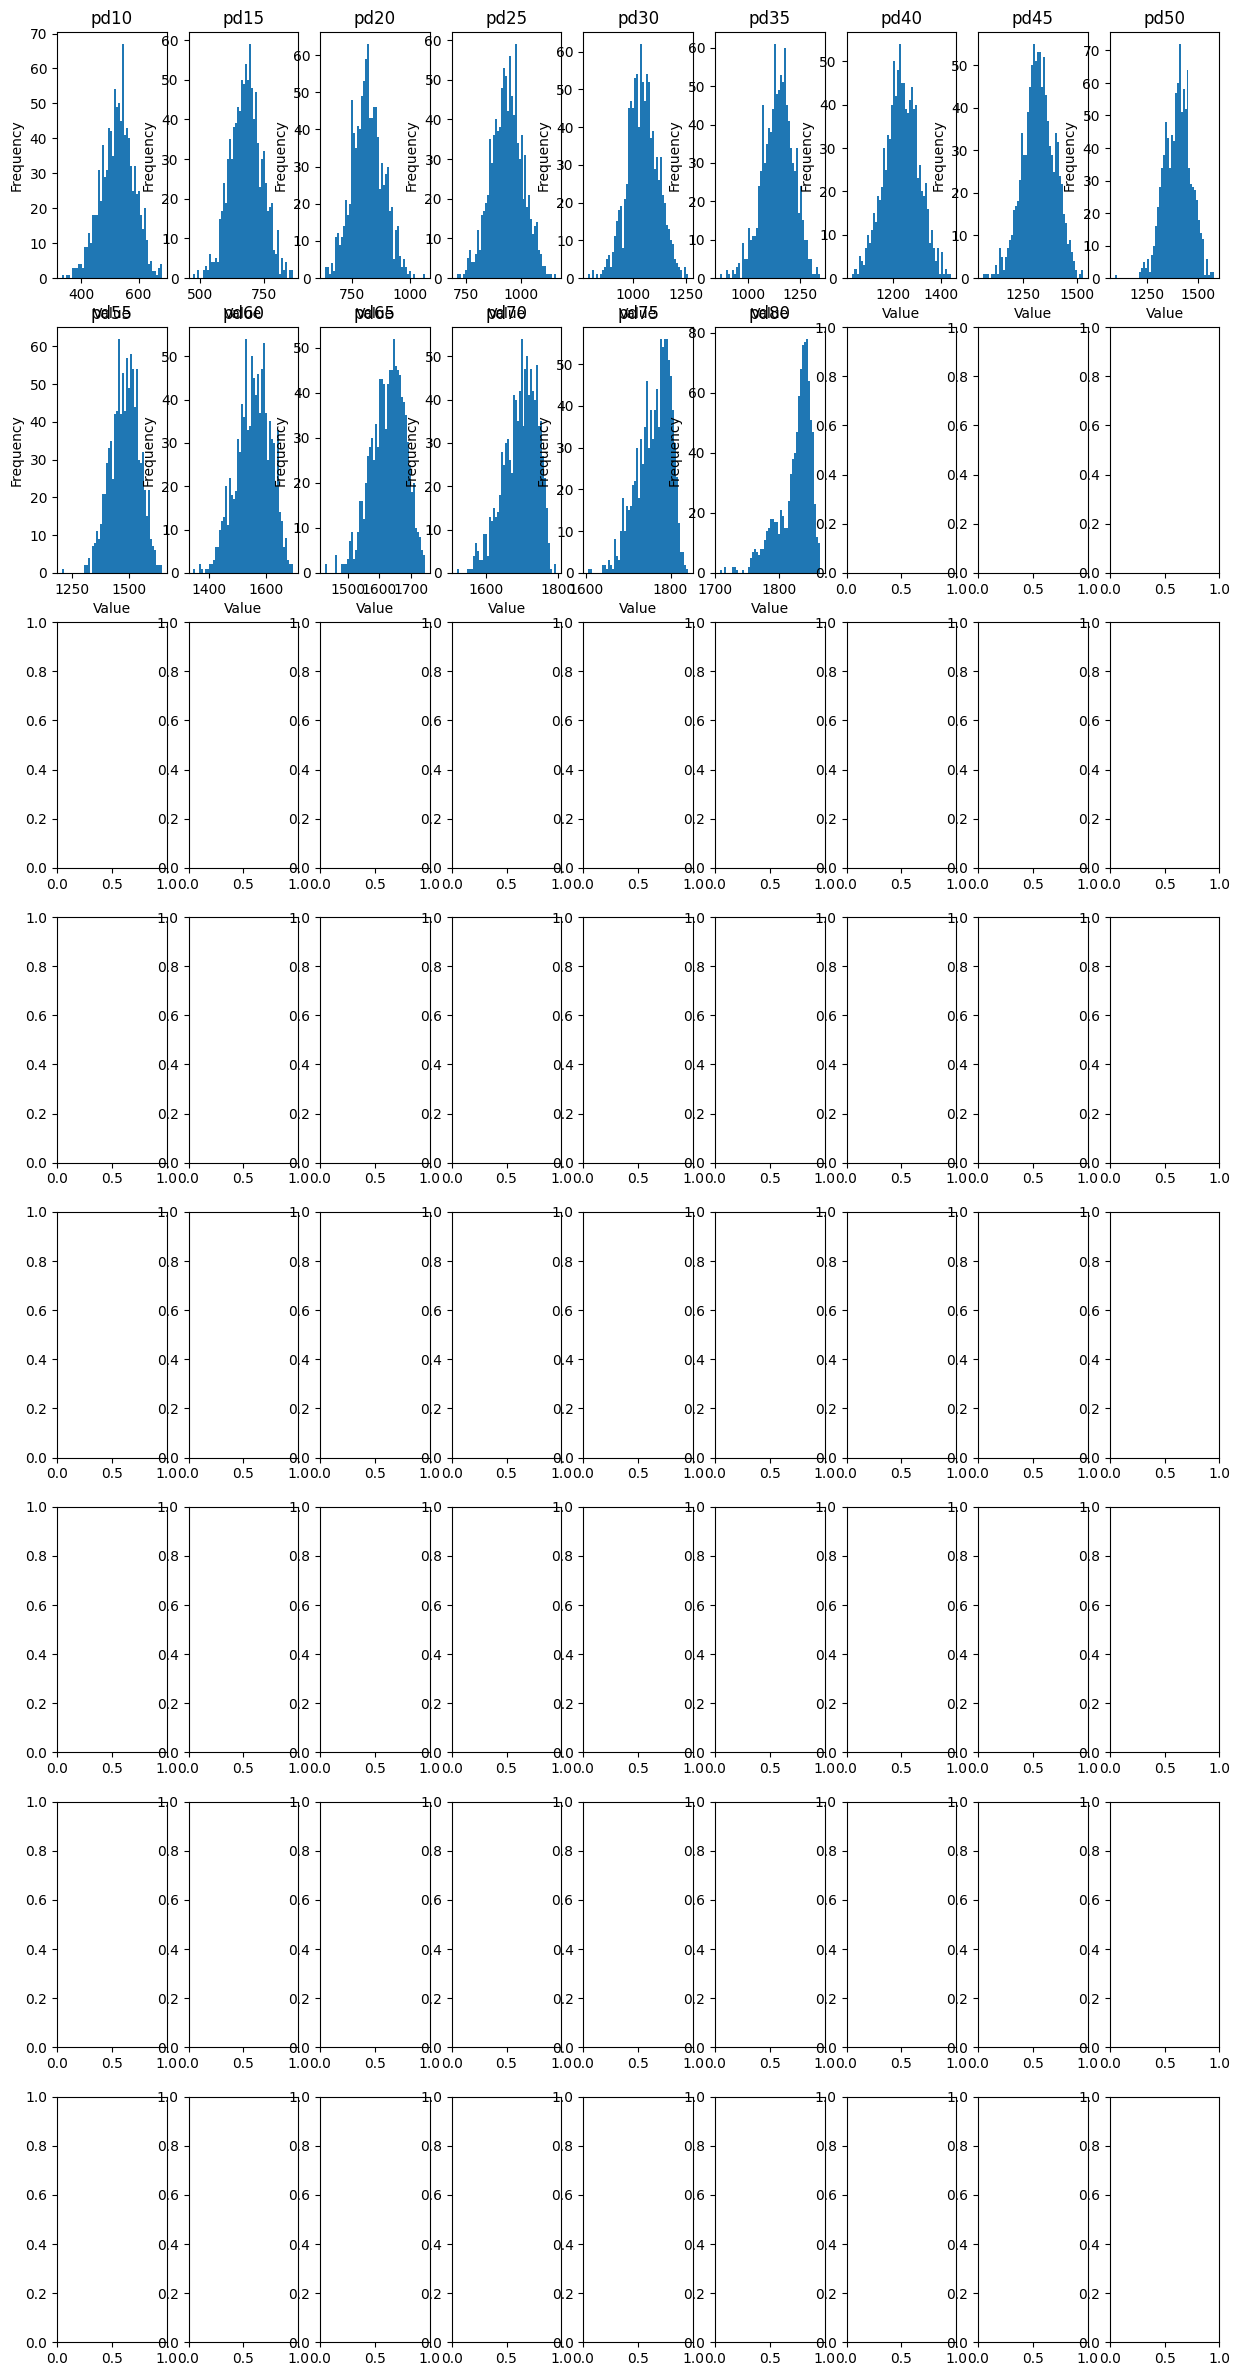

In [98]:
# Define the number of rows and columns for the grid
num_rows = 8  # Number of rows (for each pd)
num_cols = 9   # Number of columns (for each pd)

# Create a figure and axes for the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 30))

# Flatten the 2D array of axes for easier indexing
axs = axs.flatten()

# Loop through each pd and create a histogram in the corresponding subplot
for i, pd_value in enumerate(range(10, 700, 5)):
    axs[i].hist(new_pd[f'pd{pd_value}'], bins=50)
    axs[i].set_title(f'pd{pd_value}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

plt.draw()
# Save the plot as an image file
save_directory = 'birds/histograms_grid_ecoregion_pd'+ ecoregion_code + '.png'
plt.savefig(save_directory)

# Show the plot
plt.show()


#this is for all of california. 

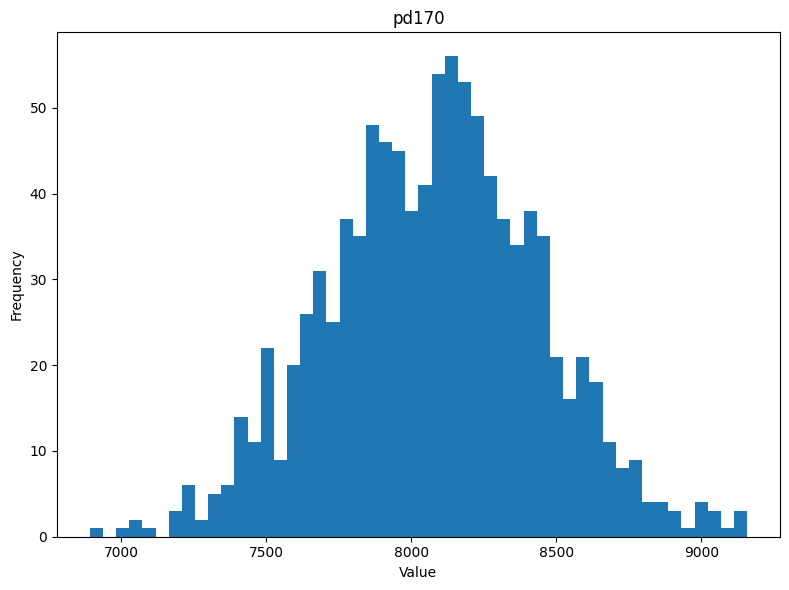

In [427]:
import matplotlib.pyplot as plt

# Filter the data to include only pd170
pd170_data = new_pd['pd170']

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a histogram for pd170
ax.hist(pd170_data, bins=50)

# Set plot title and labels
ax.set_title('pd170')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Save the plot as an image file
save_directory = 'birds/histogram_pd170_ecoregion_pd_species_leve' + ecoregion_code + '.png'
plt.savefig(save_directory)

# Show the plot
plt.show()

In [17]:


#can use values instead of dictionary[key]
#CI conglomerate seems to not have too much function
#this is classical statistics and does NOT represent the data properly. 

#def CI_conglomerate(dictionary): #assuming normal distribution
#    #checks for nans
#    #dictionary = {key: value for key, value in dictionary.items() if not any(np.isnan(value))}
#    low_array = []
#    high_array = []
#    mean_array = []
#    for key, values in dictionary.keys():
#        print(key)
#        mean_temp = np.mean(dictionary[key])
#        CI_temp = st.t.interval(confidence=0.95, df=len(dictionary[key])-1, loc=np.mean(dictionary[key]), scale=st.sem(dictionary[key]))
#        low_array.append(CI_temp[0])
#        high_array.append(CI_temp[1])
#        mean_array.append(mean_temp)
#    return(low_array,high_array,mean_array)

#new_CI = CI_conglomerate(new_mpd)
#print(new_CI)

#issue: have some nan values. 

In [361]:
def CI_bootstrap(dictionary): #assuming normal distribution
    low_array = []
    high_array = []
    mean_array = []
    for key in dictionary.keys():
        #print(key)
        data_temp = dictionary[key]
        upper_bound_bootstrap = np.percentile(data_temp,97.5)
        #print(upper_bound_bootstrap)
        lower_bound_bootstrap = np.percentile(data_temp,2.5)
        #print(lower_bound_bootstrap)
        low_array.append(lower_bound_bootstrap)
        high_array.append(upper_bound_bootstrap)
        mean_array.append(np.mean(dictionary[key]))
    return(low_array,high_array,mean_array)



In [17]:
#could definitely do this in a much much much much much cleaner and better way. 
def quantile_bootstrap(dictionary): #assuming normal distribution
    low_25_array =[]
    low_10_array =[]
    low_5_array = []
    low_2point5_array = []
    low_2_array = []
    low_1point5_array = []
    low_1_array = []
    low_point5_array = []
    high_25_array =[]
    high_10_array =[]
    high_5_array = []
    high_2point5_array = []
    high_2_array = []
    high_1_array = []
    high_1point5_array = []
    high_point5_array = []
    med_array = []
    mean_array = []
    for key in dictionary.keys():
        #print(key)
        data_temp = dictionary[key]
        low_25 = np.percentile(data_temp, 25.0)
        low_10 = np.percentile(data_temp, 10.0)
        low_5 = np.percentile(data_temp, 5.0)
        low_2point5 = np.percentile(data_temp, 2.5)
        low_2 = np.percentile(data_temp, 2)
        low_1point5 = np.percentile(data_temp, 1.5)
        low_1 = np.percentile(data_temp, 1)
        low_point5 = np.percentile(data_temp,0.5)
        high_25 = np.percentile(data_temp, 75.0)
        high_10 = np.percentile(data_temp, 90.0)
        high_5 = np.percentile(data_temp, 95.0)
        high_2point5 = np.percentile(data_temp, 97.5)
        high_2 = np.percentile(data_temp, 98)
        high_1point5 = np.percentile(data_temp,98.5)
        high_1 = np.percentile(data_temp, 99)
        high_point5 = np.percentile(data_temp, 99.5)
        low_25_array.append(low_25)
        low_10_array.append(low_10)
        low_5_array.append(low_5)
        low_2point5_array.append(low_2point5)
        low_2_array.append(low_2)
        low_1point5_array.append(low_1point5)
        low_1_array.append(low_1)
        low_point5_array.append(low_point5)
        high_25_array.append(high_25)
        high_10_array.append(high_10)
        high_5_array.append(high_5)
        high_2point5_array.append(high_2point5)
        high_2_array.append(high_2)
        high_1point5_array.append(high_1point5)
        high_1_array.append(high_1)
        high_point5_array.append(low_point5)

        med_array.append(np.percentile(data_temp, 50)) #median value.
        mean_array.append(np.mean(data_temp))
    
    return(low_point5_array, low_1_array, low_1point5_array, low_2_array, low_2point5_array, low_5_array,low_10_array,low_25_array, high_25_array, high_10_array, high_2point5_array, high_2_array, high_1point5_array, high_1_array, high_point5_array, med_array, mean_array)



In [18]:
#cleaner version of quantiles function 
def quantile_bootstrap_clean(dictionary): 
    data = {}
    for key in dictionary.keys():
        data_temp = dictionary[key]
        quantiles = [0.5, 1, 1.5, 2, 2.5, 5, 10, 25, 75, 90, 97.5, 98, 98.5, 99, 99.5]
        percentiles = {q: np.percentile(data_temp, q) for q in quantiles}
        percentiles['Median'] = np.percentile(data_temp, 50)
        percentiles['Mean'] = np.mean(data_temp)
        data[key] = percentiles

    return pd.DataFrame(data)

In [2022]:
CI_mpd_bootstrap = CI_bootstrap(new_mpd) #CI for mpd

CI_mntd_bootstrap = CI_bootstrap(new_mntd)  #CI for mntd

CI_pd_bootstrap = CI_bootstrap(new_pd)

print(CI_mntd_bootstrap)
#seems like size of 55 throws an error. 

([114.38833970249999, 112.427525861, 110.605900616375, 106.18097209870001, 105.65593487666635, 99.1034601220429, 97.0634032097125, 96.32264273445728, 93.029142391903, 90.0922461462909, 87.1491269517867, 87.23999993324927, 84.73906078207429, 83.89843011039167, 82.75124581882407, 82.06271646381059, 80.03683644143317, 80.4215649942989, 77.8251845059485, 75.70439724546901, 76.71416479535229, 74.38546805062944, 74.32557254269982, 72.8641051054732, 72.89587769763025, 71.84672628654792, 72.05880993361268, 71.10666704991742, 70.06550978752479, 69.36465750274617, 69.1366471877263, 68.08741928451691, 67.9123751128127, 67.6447180394108, 66.91895758765735, 66.26381386511, 65.89043672618556, 65.58264725283509, 65.55264856874793, 64.76487362437751, 64.76971582220874, 64.62647161805212, 64.18005785940059, 63.22424547119368, 62.944994442961985, 63.02402713638021, 62.658002916817765, 62.36035268968718, 62.08794020663815, 61.80657527214186, 61.670300614288166, 61.38832851073613, 61.0613025073562, 60.511

In [2023]:
quantile_mpd_bootstrap = quantile_bootstrap(new_mpd) #CI for mpd

quantile_mntd_bootstrap = quantile_bootstrap(new_mntd) #CI for mpd

quantile_pd_bootstrap = quantile_bootstrap(new_pd) #CI for mpd


#need to expor these quantile data as csvs 

In [2024]:
quantile_mpd_bootstrap_clean = quantile_bootstrap_clean(new_mpd)

quantile_mntd_bootstrap_clean = quantile_bootstrap_clean(new_mntd)

quantile_pd_bootstrap_clean = quantile_bootstrap_clean(new_pd)

               pd10         pd15         pd20         pd25         pd30  \
0.5      904.072715  1311.530860  1619.089549  1880.621189  2228.329040   
1        923.843242  1344.246200  1650.808362  1938.379307  2281.112723   
1.5      975.735005  1362.415450  1691.630511  1960.625585  2314.973538   
2        983.401660  1378.215022  1702.626065  1989.545104  2331.068828   
2.5      988.815161  1389.027609  1729.965009  2029.580580  2356.440320   
5       1040.067390  1431.449411  1777.223575  2109.467858  2419.320166   
10      1088.723939  1490.323079  1857.454485  2185.150006  2511.582727   
25      1187.022016  1597.704981  1974.090222  2318.708818  2670.149839   
75      1365.894528  1846.870526  2251.373201  2631.903580  3015.712053   
90      1494.686699  1958.264772  2375.987961  2763.130789  3147.920721   
97.5    1574.903213  2074.979049  2477.150638  2905.957566  3283.865935   
98      1579.199326  2084.005251  2494.059225  2917.838942  3287.759799   
98.5    1586.220760  2101

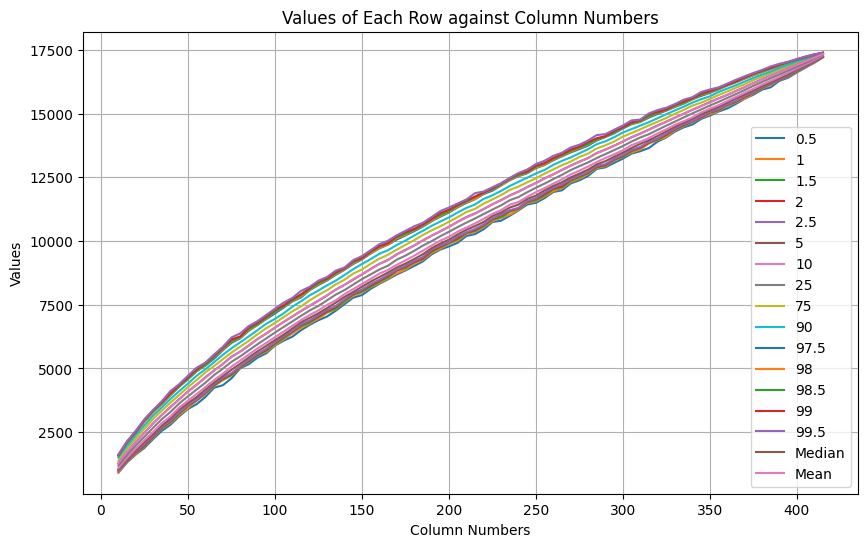

In [2026]:
print(quantile_pd_bootstrap_clean)
plt.figure(figsize=(10, 6))
for index, row in quantile_pd_bootstrap_clean.iterrows():
    plt.plot([int(col[2:]) for col in quantile_pd_bootstrap_clean.columns], row, label=index)

plt.xlabel('Column Numbers')
plt.ylabel('Values')
plt.title('Values of Each Row against Column Numbers')
plt.legend()
plt.grid(True)
plt.show()

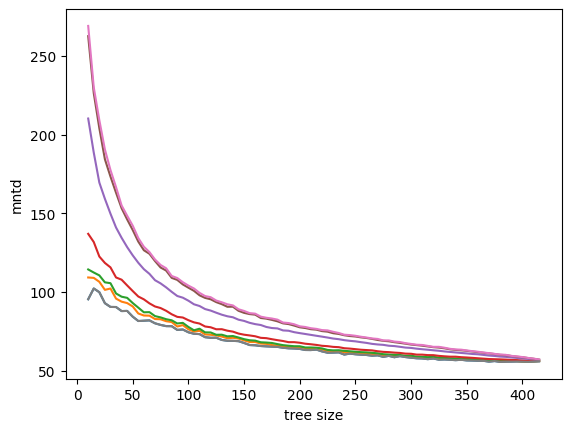

In [2027]:
#print(average_mpd_rnd)

#plot the quantiles 
for i in range(len(quantile_mntd_bootstrap)-1):
    if i % 2 == 0:
        plt.plot(tree_sizes, quantile_mntd_bootstrap[i])

labels2 = ("low", "high", "mean")
plt.ylabel("mntd")
plt.xlabel("sample size")
plt.xlabel('tree size')

plt.savefig(os.path.join(save_directory, 'genus_level_mntd_95CI.jpg'), dpi=1200)
plt.show()

In [109]:
print(os.path.join(save_directory, 'species_mntd_95CI.jpg'))

/Users/mayachari/Desktop/bird/Parallel_Hoffman_full/Plants/ecoregion_data/9/species_mntd_95CI.jpg


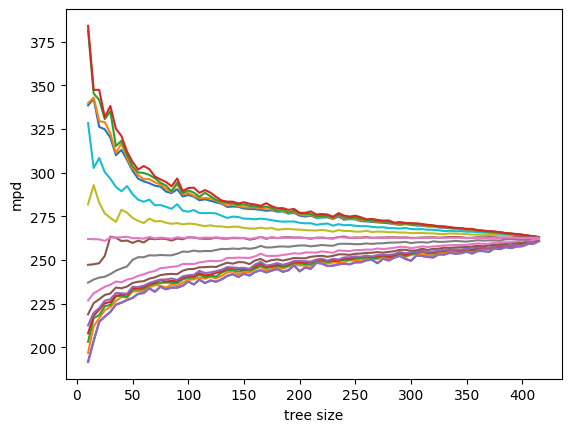

In [2028]:
#print(average_mpd_rnd)

#plot the quantiles 
for i in range(len(quantile_mpd_bootstrap)):
    plt.plot(tree_sizes, quantile_mpd_bootstrap[i])

#labels2 = ("low", "high", "mean")
plt.ylabel("mpd")
plt.xlabel("sample size")
plt.xlabel('tree size')
plt.savefig(os.path.join(save_directory, 'genus_mpd_95CI.jpg'), dpi=1200)
plt.show()

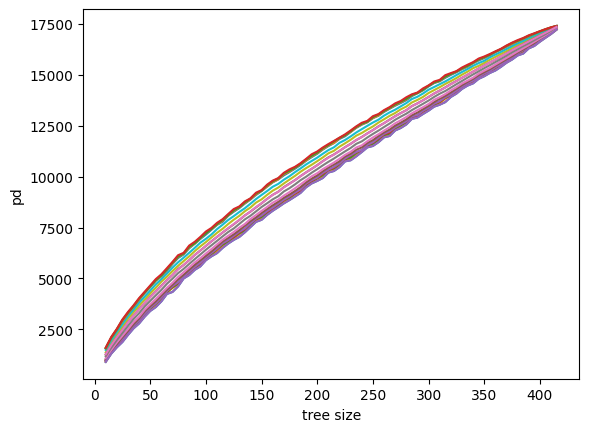

In [2029]:
#print(average_mpd_rnd)

#plot the quantiles 
for i in range(len(quantile_pd_bootstrap)):
    plt.plot(tree_sizes, quantile_pd_bootstrap[i])

#labels2 = ("low", "high", "mean")
plt.ylabel("pd")
plt.xlabel("sample size")
plt.xlabel('tree size')
plt.savefig(os.path.join(save_directory, 'genus_pd_95CI.jpg'), dpi=1200)
plt.show()

In [ ]:
#target_directory = os.getcwd() + "/"+ JOBID +"_output_files/"

#os.listdir(target_directory)

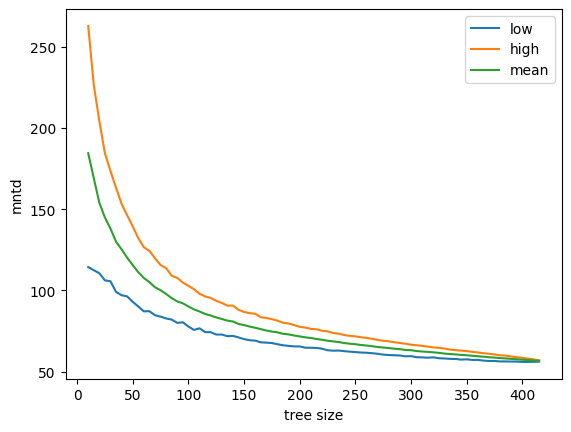

In [2030]:
#print(average_mpd_rnd)
plt.plot(tree_sizes, CI_mntd_bootstrap[0])
plt.plot(tree_sizes, CI_mntd_bootstrap[1])
plt.plot(tree_sizes,CI_mntd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("mnpd")
plt.xlabel("sample size")
#plt.title('95% CI for expected Mntd across tree sizes')
plt.xlabel('tree size')
plt.ylabel('mntd')
plt.legend(labels2)
plt.savefig(os.path.join(save_directory, 'genus_mntd_95CI.jpg'), dpi=1200)


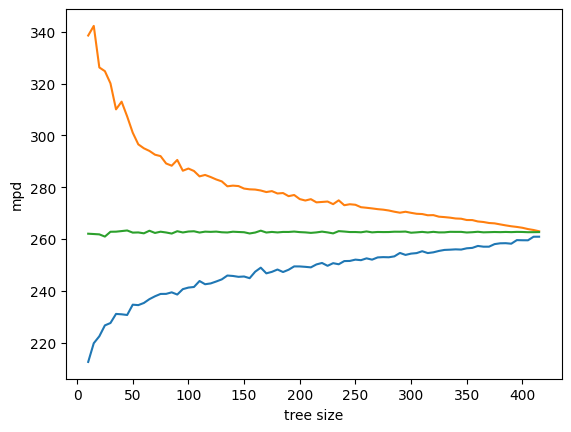

In [2031]:
plt.plot(tree_sizes, CI_mpd_bootstrap[0])
plt.plot(tree_sizes, CI_mpd_bootstrap[1])
plt.plot(tree_sizes,CI_mpd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("mpd")
plt.xlabel("sample size")
#plt.title('95% CI for expected Mpd across tree sizes')
plt.xlabel('tree size')
plt.ylabel('mpd')
plt.savefig(os.path.join(save_directory, 'genus_mpd_95CI.jpg'), dpi=1200)


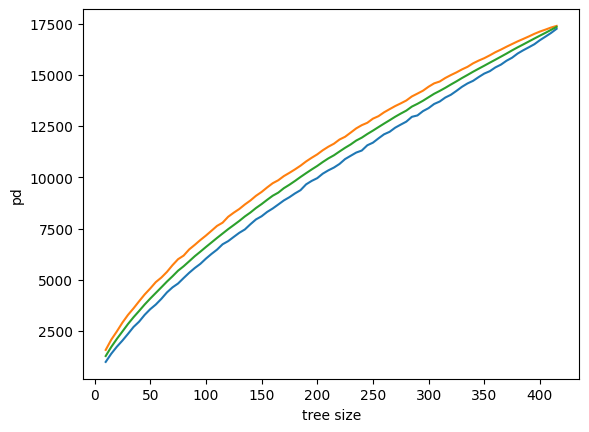

In [2032]:
plt.plot(tree_sizes, CI_pd_bootstrap[0])
plt.plot(tree_sizes, CI_pd_bootstrap[1])
plt.plot(tree_sizes,CI_pd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("pd")
plt.xlabel("sample size")
#plt.title('95% CI for expected [d] across tree sizes')
plt.xlabel('tree size')
plt.ylabel('pd')
plt.savefig(os.path.join(save_directory, 'genus_pd_95CI.jpg'), dpi=1200)



In [2033]:
CI_export_mpd = pd.DataFrame(CI_mpd_bootstrap)
CI_colnames = dict.keys(new_mpd)
CI_export_mpd.columns = CI_colnames
CI_export_mpd.index = ["Low", "High", "Mean"]
CI_export_mpd.to_csv(os.path.join(save_directory,extra_naming_info + "CI_mpd_output_bootstrap_0505.csv"))


In [2034]:
CI_export_mntd = pd.DataFrame(CI_mntd_bootstrap)
CI_colnames = dict.keys(new_mntd)
CI_export_mntd.columns = CI_colnames
CI_export_mntd.index = ["Low", "High", "Mean"]
CI_export_mntd.to_csv(os.path.join(save_directory, extra_naming_info + "CI_mntd_output_bootstrap_0505.csv"))

In [2035]:
CI_export_pd = pd.DataFrame(CI_pd_bootstrap)
CI_colnames = dict.keys(new_pd)
CI_export_pd.columns = CI_colnames
CI_export_pd.index = ["Low", "High", "Mean"]
CI_export_pd.to_csv(os.path.join(save_directory,extra_naming_info + "CI_pd_output_bootstrap_0505.csv"))

In [2036]:

quantile_export_mpd = pd.DataFrame(quantile_mpd_bootstrap_clean)
quantile_export_mpd.to_csv(os.path.join(save_directory, extra_naming_info + "_quantile_mpd_output_bootstrap.csv"))

quantile_export_mntd = pd.DataFrame(quantile_mntd_bootstrap_clean)
quantile_export_mntd.to_csv(os.path.join(save_directory, extra_naming_info + "_quantile_mntd_output_bootstrap.csv"))

quantile_export_pd = pd.DataFrame(quantile_pd_bootstrap_clean)
quantile_export_pd.to_csv(os.path.join(save_directory, extra_naming_info + "_quantile_pd_output_bootstrap.csv"))

